### Indeed.ca Job Title Summary Data NLP

In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
df = pd.read_csv("sept_final_preprocessed.csv", usecols = ['job_title','company_name','summary'])

In [7]:
df.head()

,job_title,company_name,summary
0,summer intern data science engineering,hsbc bank canada,building changing predictive analytical soluti...
1,student intern,skyworks,strong data analysis skill support pes custome...
2,data scientist intern,geotab,data scientist intern work alongside team fell...
3,data engineer omnia ai co op intern winter mul...,deloitte,fascinated data structures data models data pa...
4,data science intern winter toronto,intact,currently looking interns data lab r&d departm...


In [5]:
# https://www.kaggle.com/itratrahman/nlp-tutorial-using-python analysis ideas
# top words in job title
# top words in summary by job title top words?
# top words in summary by job title top words by company?
# TF-IDF extraction? 
# ... training models etc depends on shape of top words data

# might have to do iterative process to check proportion of \n
# summary top words per job title top words per company?

#### Top Words Analysis

In [8]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()
# fit the vectorizer using the text data
tfid_vectorizer.fit(df['job_title'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  

In [9]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

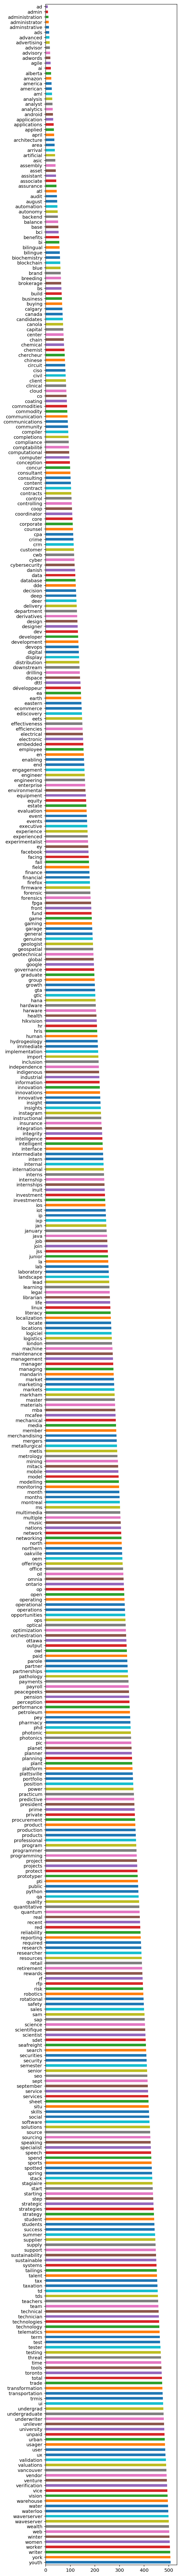

In [35]:
top_vacab = vocab_bef_stem.head(500)
top_vacab.plot(kind = 'barh', figsize=(5,100))

In [24]:
# potentially usable (high volume)
workable_title_vocab = ["web",
                        "ux",
                        "undergraduate",
                        "ui",
                        "testing",
                        "tester",
                        "test",
                        "technology",
                        "technologies",
                        "stack",
                        "software",
                        "scientist",
                        "researcher",
                        "research",
                        "quantitative",
                        "quality",
                        "qa",
                        "python",
                        "prototyper",
                        "programming",
                        "programmer",
                        "program",
                        "predictive",
                        "modelling",
                        "machine",
                        "learning",
                        "java",
                        "dev",
                        "developer",
                        "deep",
                        "database",
                        "data",
                        "analytics",
                        "analyst",
                        "analysis"
                       ]

In [25]:
import re
searchfor = workable_title_vocab
s = df.job_title.str.contains('|'.join(searchfor))
df2 = df[s]

In [28]:
len(df)
len(df2)

616

In [31]:
# https://towardsdatascience.com/how-to-filter-rows-of-a-pandas-dataframe-by-column-value-51996ea621f8
# filtered for job titles containing tokens in list

df2 = df2.drop_duplicates()

In [33]:
len(df2) # somehow have dupes here again? .. ok

605

In [34]:
df2 = df2.reset_index(drop=True)
df2.head()

,job_title,company_name,summary
0,summer intern data science engineering,hsbc bank canada,building changing predictive analytical soluti...
1,data scientist intern,geotab,data scientist intern work alongside team fell...
2,data engineer omnia ai co op intern winter mul...,deloitte,fascinated data structures data models data pa...
3,data science intern winter toronto,intact,currently looking interns data lab r&d departm...
4,data insight specialist co op intern,general motors,data insight specialist assist warranty field ...
